# 获取图像直方图

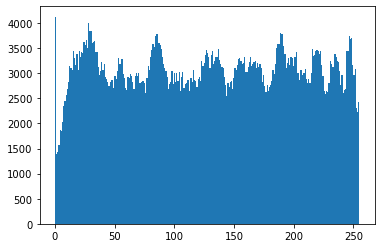

In [7]:
#encoding:utf-8
import cv2  
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('junheng.jpg')
plt.hist(src.ravel(), 256)
plt.show()

# 直方图归一化

In [8]:
from PIL import Image
from pylab import *
from numpy import *


def histeq(im, nbr_bins=256):
    """对一幅灰度图像进行直方图均衡化"""
    # 计算图像的直方图
    # 在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()   #
    cdf = 255.0 * cdf / cdf[-1]
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf


im = array(Image.open('img\space\lena.jpg').convert('L'))
im2, cdf = histeq(im)

im2 = Image.fromarray(uint8(im2))
im2.show()
# print(cdf)
# plt.plot(cdf)
# im2.save("junheng.jpg")


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.
